In [1]:
import pandas as pd

# Load the dataset
file_path = "Attrition_Binary.csv"
df = pd.read_csv(file_path)

# Display general info about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Show basic statistics for numerical columns
describe_df = df.describe()
print("\nDescriptive Statistics:\n", describe_df)

# Show value counts for the target variable
target_distribution = df['risk_of_attrition'].value_counts()
print("\nTarget Variable Distribution:\n", target_distribution)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   1000 non-null   float64
 1   service_agreement        1000 non-null   float64
 2   job_level                1000 non-null   float64
 3   performance_rating_2018  1000 non-null   float64
 4   performance_rating_2017  1000 non-null   float64
 5   year_of_birth            1000 non-null   float64
 6   gender                   1000 non-null   float64
 7   distance_from_home       1000 non-null   float64
 8   manager_changes          1000 non-null   float64
 9   no_of_promotions         1000 non-null   float64
 10  potential_rating         1000 non-null   float64
 11  bonus                    1000 non-null   float64
 12  no_courses_taken         1000 non-null   float64
 13  time_in_position         1000 non-null   float64
 14  awards                   

In [2]:
# Show the first few rows of the dataset
df.head()

,status,service_agreement,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,gender,distance_from_home,manager_changes,no_of_promotions,...,time_in_position,awards,signon,manager_sat,employee_sat,salary_2017,salary_2018,work_mode_Onsite,work_mode_Remote,risk_of_attrition
0,0.970634,-0.416435,-2.389425,2.305060,1.005527,-0.427834,-0.261567,1.855536,2.002947,0.069161,...,-0.072101,-0.344767,0.136311,-1.273255,1.233486,0.559084,-0.902238,0.701744,-0.808264,1
1,-1.659906,2.087968,-3.914659,0.015643,4.832612,1.104175,-0.085419,-0.654769,-0.513397,0.155099,...,-0.851577,1.941746,2.435985,0.088823,5.690191,1.131252,-1.335016,2.180643,-0.002112,1
2,-1.128351,-2.162412,0.907850,2.526546,-0.100110,-0.545614,0.193670,1.037201,0.481614,-3.856076,...,0.660101,0.642278,1.431589,1.263539,-3.589817,-0.081024,-0.722780,-0.512396,-1.467918,0
3,-0.983103,1.993471,-0.885791,0.599096,0.189938,0.261519,0.148057,2.030091,-0.330811,1.070577,...,-1.075435,-0.643150,-0.254374,-1.010591,0.756532,0.443202,0.736837,-1.346098,0.333058,1
4,0.887309,-1.222380,3.472847,0.132590,-4.920152,0.255784,-0.530011,1.864653,0.625077,0.515582,...,2.060602,-0.402757,-1.797144,0.034741,-4.199176,-2.877197,1.747059,3.151571,-1.660068,0


In [3]:
from sklearn.preprocessing import LabelEncoder

# تحديد الأعمدة النوعية (categorical)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# إنشاء نسخة من البيانات لتطبيق الترميز
df_encoded = df.copy()

# تطبيق Label Encoding على الأعمدة الثنائية
le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df_encoded[col] = le.fit_transform(df[col])
    else:
        # تطبيق One-Hot Encoding على الأعمدة متعددة الفئات (مثل work_mode)
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col, drop_first=True)

# عرض الشكل الجديد للبيانات بعد الترميز
print("شكل البيانات بعد الترميز:", df_encoded.shape)
df_encoded.head()


شكل البيانات بعد الترميز: (1000, 23)


,status,service_agreement,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,gender,distance_from_home,manager_changes,no_of_promotions,...,time_in_position,awards,signon,manager_sat,employee_sat,salary_2017,salary_2018,work_mode_Onsite,work_mode_Remote,risk_of_attrition
0,0.970634,-0.416435,-2.389425,2.305060,1.005527,-0.427834,-0.261567,1.855536,2.002947,0.069161,...,-0.072101,-0.344767,0.136311,-1.273255,1.233486,0.559084,-0.902238,0.701744,-0.808264,1
1,-1.659906,2.087968,-3.914659,0.015643,4.832612,1.104175,-0.085419,-0.654769,-0.513397,0.155099,...,-0.851577,1.941746,2.435985,0.088823,5.690191,1.131252,-1.335016,2.180643,-0.002112,1
2,-1.128351,-2.162412,0.907850,2.526546,-0.100110,-0.545614,0.193670,1.037201,0.481614,-3.856076,...,0.660101,0.642278,1.431589,1.263539,-3.589817,-0.081024,-0.722780,-0.512396,-1.467918,0
3,-0.983103,1.993471,-0.885791,0.599096,0.189938,0.261519,0.148057,2.030091,-0.330811,1.070577,...,-1.075435,-0.643150,-0.254374,-1.010591,0.756532,0.443202,0.736837,-1.346098,0.333058,1
4,0.887309,-1.222380,3.472847,0.132590,-4.920152,0.255784,-0.530011,1.864653,0.625077,0.515582,...,2.060602,-0.402757,-1.797144,0.034741,-4.199176,-2.877197,1.747059,3.151571,-1.660068,0


In [4]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

# مقياس البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# إنشاء وتدريب نموذج الانحدار اللوجستي
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = logreg_model.predict(X_test_scaled)

# حساب مقاييس الأداء
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

# عرض النتائج
print("الدقة (Accuracy):", accuracy)
print("الدقة النوعية (Precision):", precision)
print("الاسترجاع (Recall):", recall)
print("معدل F1:", f1)


الدقة (Accuracy): 0.85
الدقة النوعية (Precision): 0.8421052631578947
الاسترجاع (Recall): 0.8421052631578947
معدل F1: 0.8421052631578947


In [7]:
pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 6.6 MB/s eta 0:00:00


In [8]:
import arabic_reshaper
from bidi.algorithm import get_display


# Function to properly display Arabic text
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

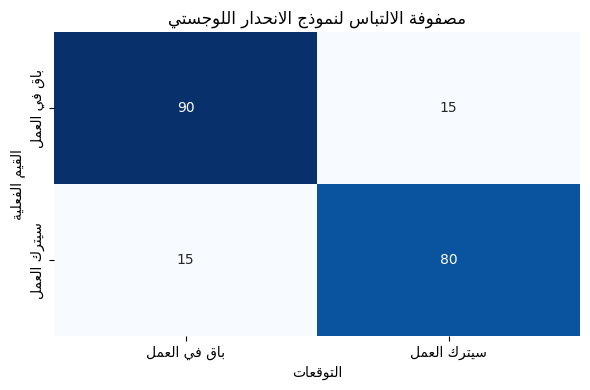

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)

# رسم مصفوفة الالتباس باستخدام heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[fix_arabic_text("باقٍ في العمل"), fix_arabic_text("سيترك العمل")],
            yticklabels=[fix_arabic_text("باقٍ في العمل"), fix_arabic_text("سيترك العمل")])
plt.xlabel(fix_arabic_text("التوقعات"))
plt.ylabel(fix_arabic_text("القيم الفعلية"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج الانحدار اللوجستي"))
plt.tight_layout()
plt.show()


In [12]:
# Function to properly format Arabic text
def format_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

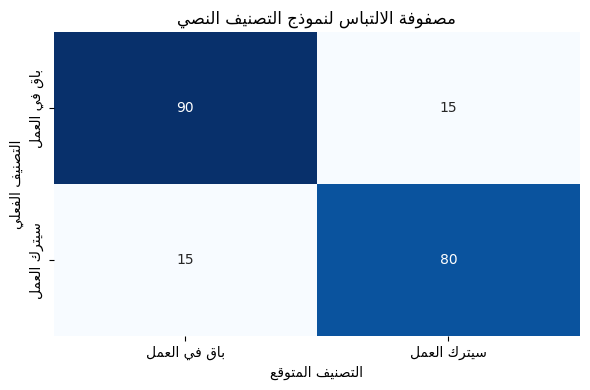

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Format Arabic labels
arabic_labels = ["باقٍ في العمل", "سيترك العمل"]
formatted_labels = [fix_arabic_text(label) for label in arabic_labels]

# Create heatmap with proper Arabic text
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=formatted_labels,
            yticklabels=formatted_labels)

plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج التصنيف النصي"))
plt.tight_layout()
plt.show()

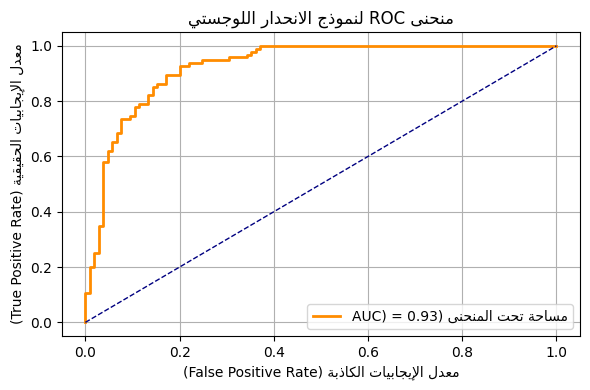

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# حساب احتمالات الانتماء للفئة الإيجابية
y_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]

# حساب منحنى ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# رسم منحنى ROC
plt.figure(figsize=(6, 4))
label=fix_arabic_text(f'مساحة تحت المنحنى (AUC) = {roc_auc:.2f}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # خط العشوائية
plt.xlabel(fix_arabic_text('معدل الإيجابيات الكاذبة (False Positive Rate)'))
plt.ylabel(fix_arabic_text('معدل الإيجابيات الحقيقية (True Positive Rate)'))
plt.title(fix_arabic_text('منحنى ROC لنموذج الانحدار اللوجستي'))
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# تطبيق مقياس Min-Max لجعل القيم موجبة
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# اختيار أفضل 10 متغيرات باستخدام SelectKBest + chi2
selector = SelectKBest(score_func=chi2, k=5)
X_train_kbest = selector.fit_transform(X_train_minmax, y_train)
X_test_kbest = selector.transform(X_test_minmax)

# تدريب نموذج الانحدار اللوجستي
logreg_kbest = LogisticRegression(random_state=42)
logreg_kbest.fit(X_train_kbest, y_train)

# التنبؤ والتقييم
y_pred_kbest = logreg_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
precision_kbest = precision_score(y_test, y_pred_kbest)
recall_kbest = recall_score(y_test, y_pred_kbest)
f1_kbest = f1_score(y_test, y_pred_kbest)

# عرض نتائج التقييم
print(f"الدقة (Accuracy): {accuracy_kbest:.2f}")
print(f"الدقة النوعية (Precision): {precision_kbest:.2f}")
print(f"الاسترجاع (Recall): {recall_kbest:.2f}")
print(f"معامل F1: {f1_kbest:.2f}")

# عرض أسماء المتغيرات المختارة
selected_features = X.columns[selector.get_support()]
print("المتغيرات المختارة:")
for feature in selected_features:
    print("-", feature)


الدقة (Accuracy): 0.82
الدقة النوعية (Precision): 0.81
الاسترجاع (Recall): 0.82
معامل F1: 0.82
المتغيرات المختارة:
- job_level
- performance_rating_2018
- no_of_promotions
- no_courses_taken
- time_in_position


In [16]:
from sklearn.preprocessing import LabelEncoder

# تحديد الأعمدة النوعية (categorical)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# إنشاء نسخة من البيانات لتطبيق الترميز
df_encoded = df.copy()

# تطبيق Label Encoding على الأعمدة الثنائية
le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df_encoded[col] = le.fit_transform(df[col])
    else:
        # تطبيق One-Hot Encoding على الأعمدة متعددة الفئات (مثل work_mode)
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col, drop_first=True)

# عرض الشكل الجديد للبيانات بعد الترميز
print("شكل البيانات بعد الترميز:", df_encoded.shape)
df_encoded.head()

شكل البيانات بعد الترميز: (1000, 23)


,status,service_agreement,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,gender,distance_from_home,manager_changes,no_of_promotions,...,time_in_position,awards,signon,manager_sat,employee_sat,salary_2017,salary_2018,work_mode_Onsite,work_mode_Remote,risk_of_attrition
0,0.970634,-0.416435,-2.389425,2.305060,1.005527,-0.427834,-0.261567,1.855536,2.002947,0.069161,...,-0.072101,-0.344767,0.136311,-1.273255,1.233486,0.559084,-0.902238,0.701744,-0.808264,1
1,-1.659906,2.087968,-3.914659,0.015643,4.832612,1.104175,-0.085419,-0.654769,-0.513397,0.155099,...,-0.851577,1.941746,2.435985,0.088823,5.690191,1.131252,-1.335016,2.180643,-0.002112,1
2,-1.128351,-2.162412,0.907850,2.526546,-0.100110,-0.545614,0.193670,1.037201,0.481614,-3.856076,...,0.660101,0.642278,1.431589,1.263539,-3.589817,-0.081024,-0.722780,-0.512396,-1.467918,0
3,-0.983103,1.993471,-0.885791,0.599096,0.189938,0.261519,0.148057,2.030091,-0.330811,1.070577,...,-1.075435,-0.643150,-0.254374,-1.010591,0.756532,0.443202,0.736837,-1.346098,0.333058,1
4,0.887309,-1.222380,3.472847,0.132590,-4.920152,0.255784,-0.530011,1.864653,0.625077,0.515582,...,2.060602,-0.402757,-1.797144,0.034741,-4.199176,-2.877197,1.747059,3.151571,-1.660068,0


الدقة (Accuracy): 0.87
الدقة النوعية (Precision): 0.86
الاسترجاع (Recall): 0.86
معامل F1: 0.86


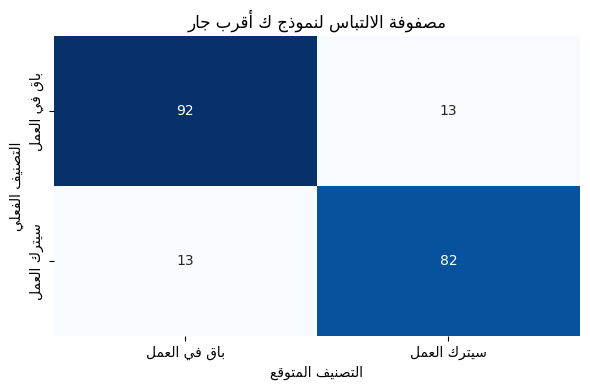

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# تطبيق مقياس Min-Max لجعل القيم موجبة
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# اختيار أفضل 5 متغيرات باستخدام SelectKBest + chi2
selector = SelectKBest(score_func=chi2, k=5)
X_train_kbest = selector.fit_transform(X_train_minmax, y_train)
X_test_kbest = selector.transform(X_test_minmax)

# تدريب نموذج ك أقرب جار
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_kbest, y_train)

# التنبؤ والتقييم
y_pred_knn = knn_model.predict(X_test_kbest)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# عرض نتائج التقييم
print(f"الدقة (Accuracy): {accuracy_knn:.2f}")
print(f"الدقة النوعية (Precision): {precision_knn:.2f}")
print(f"الاسترجاع (Recall): {recall_knn:.2f}")
print(f"معامل F1: {f1_knn:.2f}")

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_knn)
labels = "باقٍ في العمل", "سيترك العمل"
formatted_labels = [fix_arabic_text(label) for label in labels]

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=formatted_labels,
            yticklabels=formatted_labels)

plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج ك أقرب جار"))
plt.tight_layout()
plt.show()

الدقة (Accuracy): 0.82
الدقة النوعية (Precision): 0.80
الاسترجاع (Recall): 0.82
معامل F1: 0.81


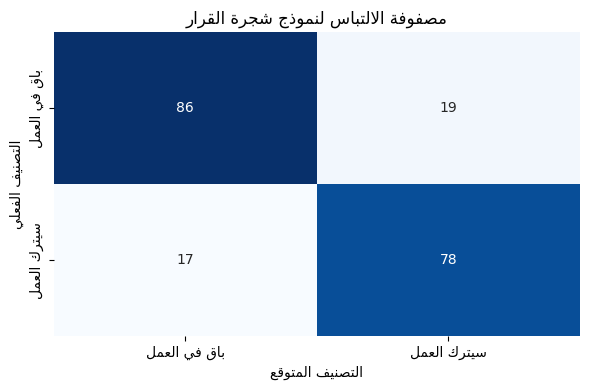

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

# دالة إصلاح النص العربي للعرض الصحيح في matplotlib
def fix_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# تدريب نموذج شجرة القرار
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# التنبؤ والتقييم
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# عرض نتائج التقييم
print(f"الدقة (Accuracy): {accuracy_dt:.2f}")
print(f"الدقة النوعية (Precision): {precision_dt:.2f}")
print(f"الاسترجاع (Recall): {recall_dt:.2f}")
print(f"معامل F1: {f1_dt:.2f}")

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_dt)
labels = ["باقٍ في العمل", "سيترك العمل"]
formatted_labels = [fix_arabic_text(label) for label in labels]

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=formatted_labels,
            yticklabels=formatted_labels)
plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج شجرة القرار"))
plt.tight_layout()
plt.show()


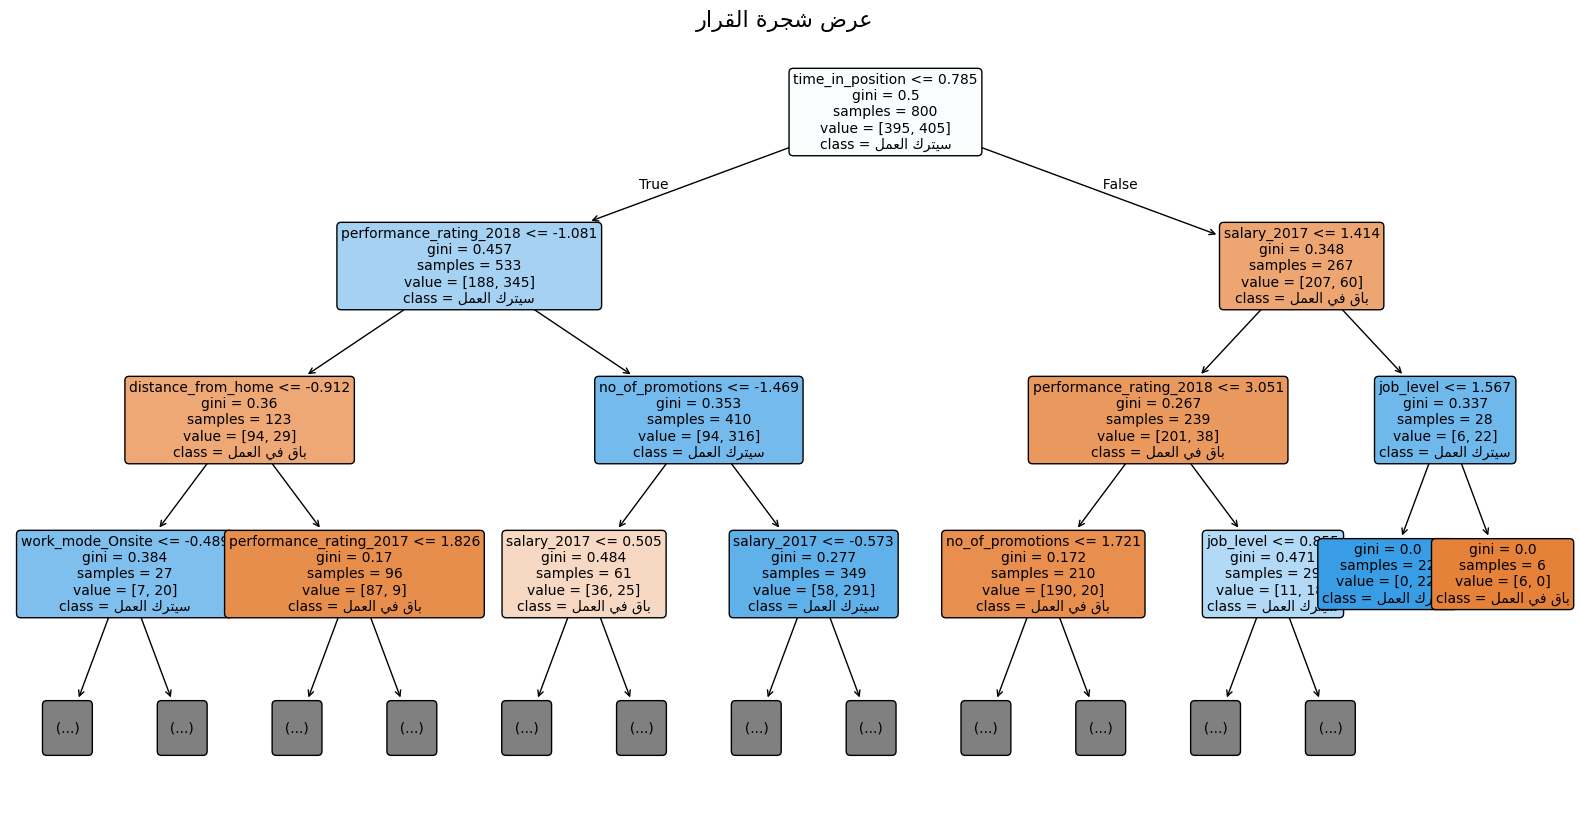

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# رسم شجرة القرار
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=[fix_arabic_text("باقٍ في العمل"), fix_arabic_text("سيترك العمل")],
          filled=True,
          rounded=True,
          fontsize=10,
           max_depth=3)
plt.title(fix_arabic_text("عرض شجرة القرار"), fontsize=16)
plt.show()


In [20]:
from sklearn.tree import export_text

# استخراج القواعد النصية من الشجرة
rules_text = export_text(dt_model, feature_names=list(X.columns))

# عرض القواعد
print(rules_text)


|--- time_in_position <= 0.78
|   |--- performance_rating_2018 <= -1.08
|   |   |--- distance_from_home <= -0.91
|   |   |   |--- work_mode_Onsite <= -0.49
|   |   |   |   |--- no_of_promotions <= 2.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- no_of_promotions >  2.80
|   |   |   |   |   |--- class: 1
|   |   |   |--- work_mode_Onsite >  -0.49
|   |   |   |   |--- class: 1
|   |   |--- distance_from_home >  -0.91
|   |   |   |--- performance_rating_2017 <= 1.83
|   |   |   |   |--- performance_rating_2017 <= -6.64
|   |   |   |   |   |--- no_courses_taken <= 1.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- no_courses_taken >  1.13
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- performance_rating_2017 >  -6.64
|   |   |   |   |   |--- manager_sat <= 2.14
|   |   |   |   |   |   |--- employee_sat <= 1.05
|   |   |   |   |   |   |   |--- potential_rating <= -3.91
|   |   |   |   |   |   |   |   |--- signon <= 0.73
|   |   |   |   |   |   |   |  

In [21]:
import pandas as pd

# استخراج الأهمية النسبية لكل ميزة
importances = dt_model.feature_importances_

# إنشاء DataFrame للعرض
feature_importance_df = pd.DataFrame({
    'الميزة': X.columns,
    'الأهمية النسبية': importances
})

# ترتيب الميزات حسب الأهمية تنازليًا
feature_importance_df = feature_importance_df.sort_values(by='الأهمية النسبية', ascending=False)

# عرض الجدول
print(feature_importance_df)


                     الميزة  الأهمية النسبية
13         time_in_position         0.183081
3   performance_rating_2018         0.177500
18              salary_2017         0.121187
4   performance_rating_2017         0.110636
9          no_of_promotions         0.101084
7        distance_from_home         0.078409
2                 job_level         0.041023
12         no_courses_taken         0.028556
14                   awards         0.019324
1         service_agreement         0.018651
17             employee_sat         0.017853
16              manager_sat         0.017385
10         potential_rating         0.016884
20         work_mode_Onsite         0.013201
6                    gender         0.012608
0                    status         0.011907
11                    bonus         0.010458
21         work_mode_Remote         0.007434
19              salary_2018         0.004501
15                   signon         0.004286
5             year_of_birth         0.004032
8         

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# تطبيق مقياس Min-Max لجعل القيم موجبة
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# اختيار أفضل 10 متغيرات باستخدام SelectKBest + chi2
selector = SelectKBest(score_func=chi2, k=5)
X_train_kbest = selector.fit_transform(X_train_minmax, y_train)
X_test_kbest = selector.transform(X_test_minmax)

# تدريب نموذج الانحدار اللوجستي
logreg_kbest = LogisticRegression(random_state=42)
logreg_kbest.fit(X_train_kbest, y_train)

# التنبؤ والتقييم
y_pred_kbest = logreg_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
precision_kbest = precision_score(y_test, y_pred_kbest)
recall_kbest = recall_score(y_test, y_pred_kbest)
f1_kbest = f1_score(y_test, y_pred_kbest)

# عرض نتائج التقييم
print(f"الدقة (Accuracy): {accuracy_kbest:.2f}")
print(f"الدقة النوعية (Precision): {precision_kbest:.2f}")
print(f"الاسترجاع (Recall): {recall_kbest:.2f}")
print(f"معامل F1: {f1_kbest:.2f}")

# عرض أسماء المتغيرات المختارة
selected_features = X.columns[selector.get_support()]
print("المتغيرات المختارة:")
for feature in selected_features:
    print("-", feature)

الدقة (Accuracy): 0.82
الدقة النوعية (Precision): 0.81
الاسترجاع (Recall): 0.82
معامل F1: 0.82
المتغيرات المختارة:
- job_level
- performance_rating_2018
- no_of_promotions
- no_courses_taken
- time_in_position


الدقة (Accuracy): 0.83
الدقة النوعية (Precision): 0.81
الاسترجاع (Recall): 0.84
معامل F1: 0.82


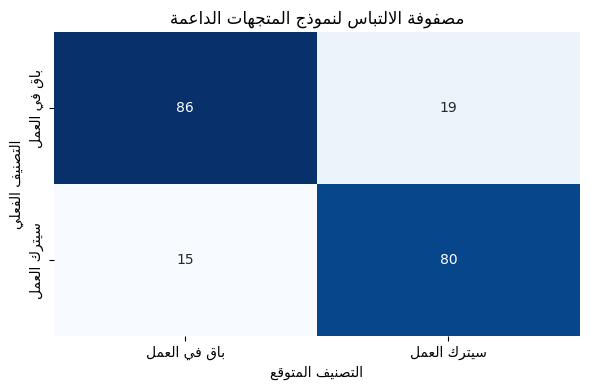

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper

# دالة لضبط عرض النص العربي
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# مقياس Min-Max
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# اختيار أفضل 5 سمات باستخدام Chi-Squared
selector = SelectKBest(score_func=chi2, k=5)
X_train_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector.transform(X_test_scaled)

# تدريب نموذج SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_kbest, y_train)

# التنبؤ
y_pred = svm_model.predict(X_test_kbest)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# عرض النتائج
print(f"الدقة (Accuracy): {accuracy:.2f}")
print(f"الدقة النوعية (Precision): {precision:.2f}")
print(f"الاسترجاع (Recall): {recall:.2f}")
print(f"معامل F1: {f1:.2f}")

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
labels = ["باقٍ في العمل", "سيترك العمل"]
formatted_labels = [fix_arabic_text(label) for label in labels]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=formatted_labels,
            yticklabels=formatted_labels)

plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج المتجهات الداعمة"))
plt.tight_layout()
plt.show()


الدقة (Accuracy): 0.94
الدقة النوعية (Precision): 0.94
الاسترجاع (Recall): 0.93
معامل F1: 0.93


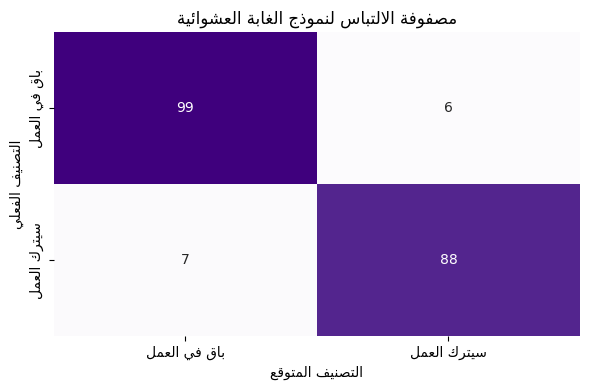

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

# دالة لمعالجة النصوص العربية للعرض
def fix_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# تدريب نموذج الغابة العشوائية
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# التنبؤ والتقييم
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# عرض نتائج التقييم
print(f"الدقة (Accuracy): {accuracy_rf:.2f}")
print(f"الدقة النوعية (Precision): {precision_rf:.2f}")
print(f"الاسترجاع (Recall): {recall_rf:.2f}")
print(f"معامل F1: {f1_rf:.2f}")

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_rf)
labels = "باقٍ في العمل", "سيترك العمل"
formatted_labels = [fix_arabic_text(label) for label in labels]

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=formatted_labels,
            yticklabels=formatted_labels)

plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج الغابة العشوائية"))
plt.tight_layout()
plt.show()



In [25]:
# عرض عدد الأشجار فعليًا
print(f"عدد الأشجار في الغابة العشوائية: {len(rf_model.estimators_)}")

عدد الأشجار في الغابة العشوائية: 100


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:08:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


الدقة (Accuracy): 0.93
الدقة النوعية (Precision): 0.92
الاسترجاع (Recall): 0.93
معامل F1: 0.92


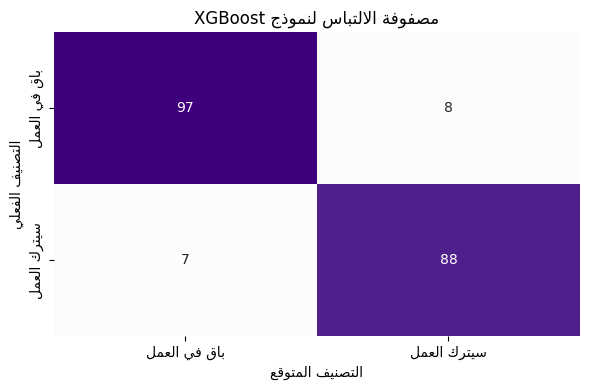

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

# دالة لتحسين عرض النص العربي
def fix_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# تدريب نموذج XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# التنبؤ والتقييم
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# عرض نتائج التقييم
print(f"الدقة (Accuracy): {accuracy:.2f}")
print(f"الدقة النوعية (Precision): {precision:.2f}")
print(f"الاسترجاع (Recall): {recall:.2f}")
print(f"معامل F1: {f1:.2f}")

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
labels = "باقٍ في العمل", "سيترك العمل"
formatted_labels = [fix_arabic_text(label) for label in labels]

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=formatted_labels,
            yticklabels=formatted_labels)

plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج XGBoost"))
plt.tight_layout()
plt.show()



الدقة (Accuracy): 0.93
الدقة النوعية (Precision): 0.92
الاسترجاع (Recall): 0.93
معامل F1: 0.92


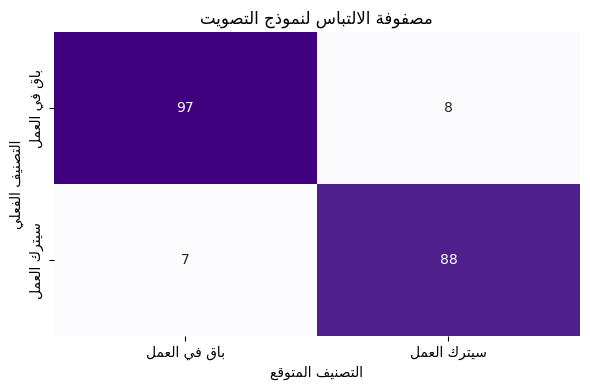

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper

# دالة لإصلاح اتجاه النص العربي
def fix_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

# تعريف المتغيرات المستقلة والتابعة
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# مقياس Min-Max لضبط القيم ضمن المجال [0,1] لتناسب النماذج الحساسة للحجم
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تعريف النماذج الفرعية
log_clf = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(probability=True, random_state=42)

# إنشاء نموذج التصويت
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', log_clf),
        ('tree', tree_clf),
        ('knn', knn_clf),
        ('svm', svm_clf)
    ],
    voting='soft'  # يستخدم الاحتمالات وليس التصويت الصلب
)

# تدريب النموذج
voting_clf.fit(X_train_scaled, y_train)

# التنبؤ والتقييم
y_pred_vote = voting_clf.predict(X_test_scaled)
accuracy_vote = accuracy_score(y_test, y_pred_vote)
precision_vote = precision_score(y_test, y_pred_vote)
recall_vote = recall_score(y_test, y_pred_vote)
f1_vote = f1_score(y_test, y_pred_vote)

# عرض نتائج التقييم
print(f"الدقة (Accuracy): {accuracy_vote:.2f}")
print(f"الدقة النوعية (Precision): {precision_vote:.2f}")
print(f"الاسترجاع (Recall): {recall_vote:.2f}")
print(f"معامل F1: {f1_vote:.2f}")

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_vote)
labels = ["باقٍ في العمل", "سيترك العمل"]
formatted_labels = [fix_arabic_text(label) for label in labels]

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=formatted_labels, yticklabels=formatted_labels)
plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج التصويت"))
plt.tight_layout()
plt.show()


الدقة (Accuracy): 0.90
الدقة النوعية (Precision): 0.89
الاسترجاع (Recall): 0.89
معامل F1: 0.89


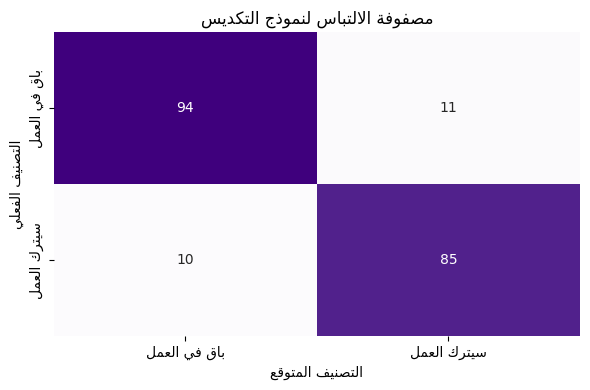

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

def fix_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

# تعريف المتغيرات
X = df_encoded.drop(columns=['risk_of_attrition'])
y = df_encoded['risk_of_attrition']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مقياس Min-Max لأن بعض النماذج (مثل KNN وSVM) تحتاجه
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# اختيار أفضل 5 ميزات (اختياري)
selector = SelectKBest(score_func=chi2, k=5)
X_train_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector.transform(X_test_scaled)

# تعريف النماذج الأساسية
estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True, random_state=42))
]

# تعريف النموذج فوقي (meta-model)
final_estimator = LogisticRegression(random_state=42)

# إنشاء نموذج التكديس
stack_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stack_model.fit(X_train_kbest, y_train)

# التنبؤ والتقييم
y_pred_stack = stack_model.predict(X_test_kbest)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)

# عرض النتائج
print(f"الدقة (Accuracy): {accuracy_stack:.2f}")
print(f"الدقة النوعية (Precision): {precision_stack:.2f}")
print(f"الاسترجاع (Recall): {recall_stack:.2f}")
print(f"معامل F1: {f1_stack:.2f}")

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_stack)
labels = ["باقٍ في العمل", "سيترك العمل"]
formatted_labels = [fix_arabic_text(label) for label in labels]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=formatted_labels,
            yticklabels=formatted_labels)

plt.xlabel(fix_arabic_text("التصنيف المتوقع"))
plt.ylabel(fix_arabic_text("التصنيف الفعلي"))
plt.title(fix_arabic_text("مصفوفة الالتباس لنموذج التكديس"))
plt.tight_layout()
plt.show()
